In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Clean the Dataset

In [12]:
df = pd.read_csv('traffic_crashes.csv')

In [14]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [79]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919274 entries, 0 to 919273
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                919274 non-null  object 
 1   CRASH_DATE_EST_I               67706 non-null   object 
 2   CRASH_DATE                     919274 non-null  object 
 3   POSTED_SPEED_LIMIT             919274 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         919274 non-null  object 
 5   DEVICE_CONDITION               919274 non-null  object 
 6   WEATHER_CONDITION              919274 non-null  object 
 7   LIGHTING_CONDITION             919274 non-null  object 
 8   FIRST_CRASH_TYPE               919274 non-null  object 
 9   TRAFFICWAY_TYPE                919274 non-null  object 
 10  LANE_CNT                       199023 non-null  float64
 11  ALIGNMENT                      919274 non-null  object 
 12  ROADWAY_SURFACE_COND          

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 851568
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         720251
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       28949
CRASH_TYPE                            0
INTERSECTION_RELATED_I           707981
NOT_RIGHT_OF_WAY_I               877521
HIT_AND_RUN_I                    630991
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [18]:
# Clean the dataset by dropping unnecessary columns
df_cleaned = df.drop(columns=['CRASH_DATE_EST_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I',
                              'DOORING_I', 'LANE_CNT', 'WORK_ZONE_TYPE', 'WORK_ZONE_I', 
                              'WORKERS_PRESENT_I', 'NOT_RIGHT_OF_WAY_I'])

In [20]:
# Check the cleaned dataset info and missing values
df_cleaned.info()
df_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919274 entries, 0 to 919273
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                919274 non-null  object 
 1   CRASH_DATE                     919274 non-null  object 
 2   POSTED_SPEED_LIMIT             919274 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         919274 non-null  object 
 4   DEVICE_CONDITION               919274 non-null  object 
 5   WEATHER_CONDITION              919274 non-null  object 
 6   LIGHTING_CONDITION             919274 non-null  object 
 7   FIRST_CRASH_TYPE               919274 non-null  object 
 8   TRAFFICWAY_TYPE                919274 non-null  object 
 9   ALIGNMENT                      919274 non-null  object 
 10  ROADWAY_SURFACE_COND           919274 non-null  object 
 11  ROAD_DEFECT                    919274 non-null  object 
 12  REPORT_TYPE                   

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       28949
CRASH_TYPE                            0
INTERSECTION_RELATED_I           707981
HIT_AND_RUN_I                    630991
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4
STREET_NAME                           1
BEAT_OF_OCCURRENCE                    5
NUM_UNITS                             0


In [22]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [24]:
# Convert 'CRASH_DATE' to datetime
df_cleaned['CRASH_DATE'] = pd.to_datetime(df_cleaned['CRASH_DATE'], errors='coerce')  # Convert to datetime

In [26]:
# Save the cleaned dataset
df_cleaned.to_csv('clean_chicago_traffic.csv', index=False)

# 2. Exploratory Data Analysis (EDA)

### 1. Nuber of Accident per Year

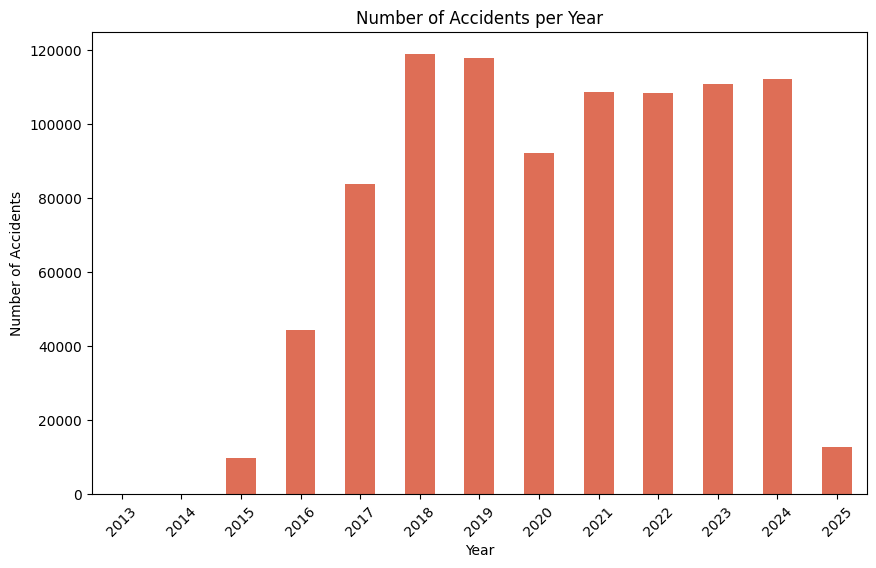

In [83]:
# Extract the year from the 'CRASH_DATE' column
df_cleaned['year'] = df_cleaned['CRASH_DATE'].dt.year

# Plot no 1: Number of Accidents per Year
accidents_per_year = df_cleaned['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='bar', color='#de6e56')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### 2. Distribution of Accidents by Hour of the Day

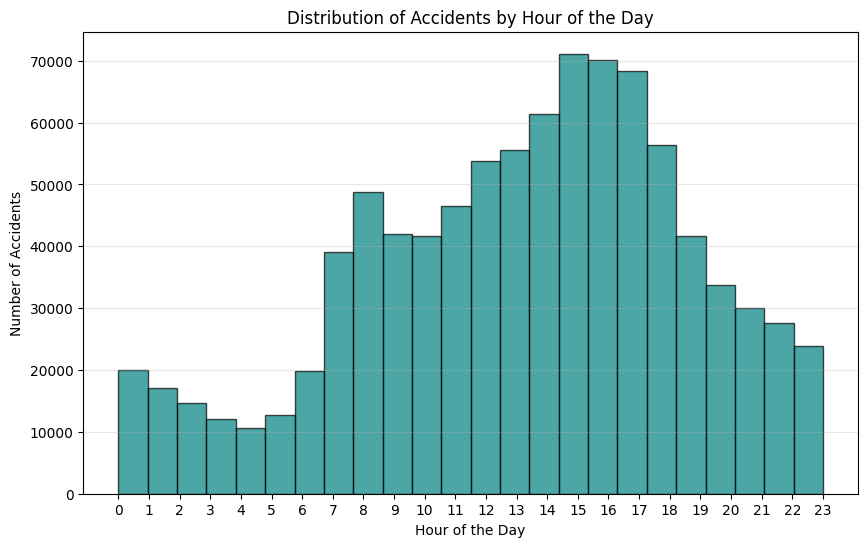

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(df['CRASH_HOUR'], bins=24, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Accidents by Hour of the Day")
plt.xticks(range(0, 24))  # Ensure all hours are displayed (0 to 23)
plt.grid(axis='y', alpha=0.3)
plt.show()

### 3. Pie Chart: Crashes by Lighting Condition

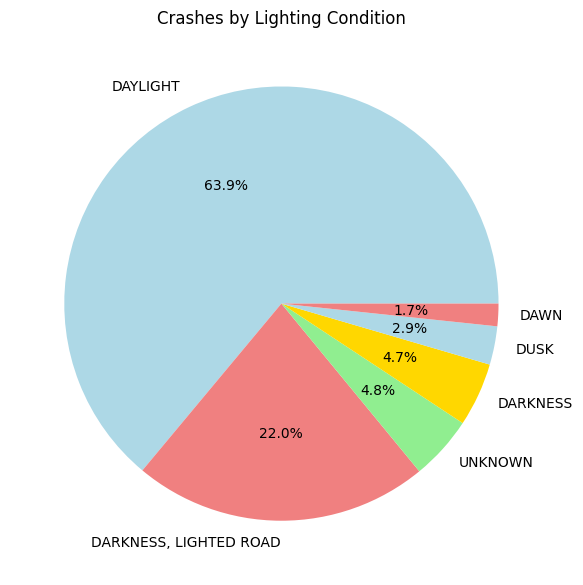

In [ ]:
plt.figure(figsize=(6, 6))
df['LIGHTING_CONDITION'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Crashes by Lighting Condition")
plt.ylabel('')
plt.tight_layout()
plt.show()

### 4. Pie Chart: Damage Caused in Accidents

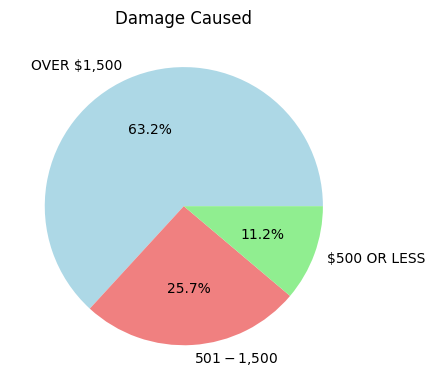

In [42]:
plt.figure(figsize=(6, 4))
df['DAMAGE'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Damage Caused")
plt.ylabel('')
plt.tight_layout()
plt.show()

### 5. Bar Chart: Accident Severity Distribution

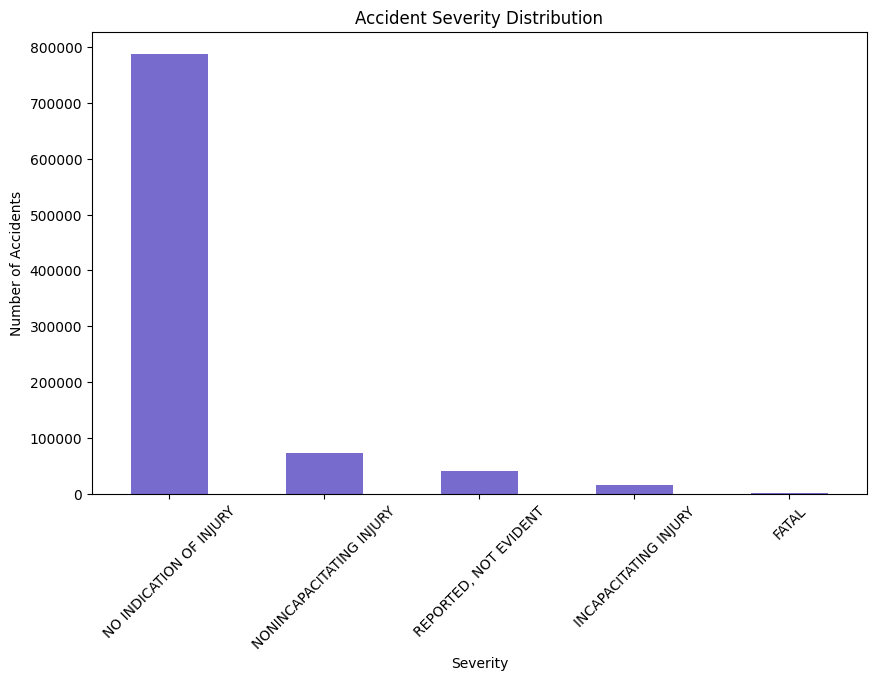

In [44]:
plt.figure(figsize=(10, 6))
df['MOST_SEVERE_INJURY'].value_counts().plot(kind='bar', color='#776bcd')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### 6. Bar Chart: Crashes by Weather Condition

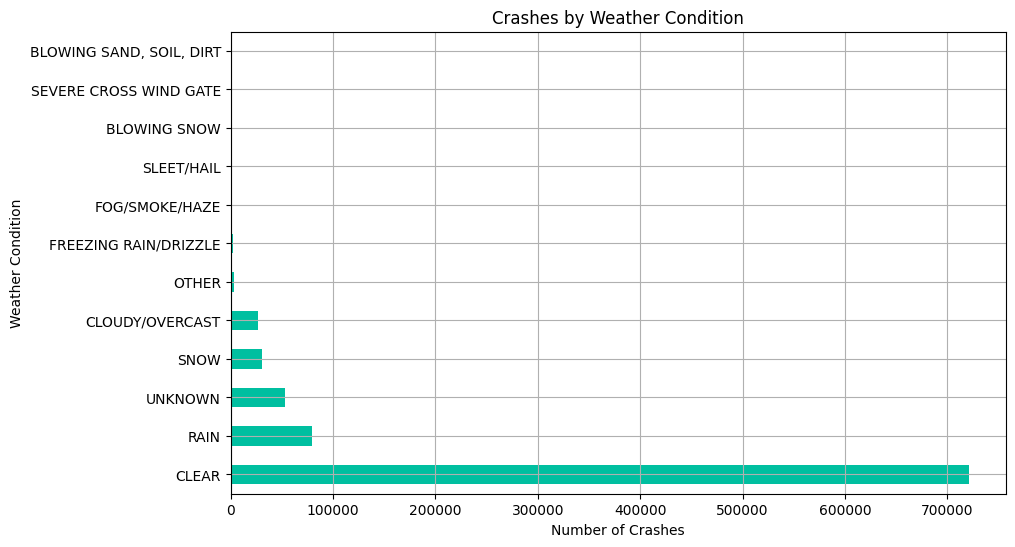

In [46]:
df_cleaned['WEATHER_CONDITION'].value_counts().plot(kind='barh', figsize=(10, 6), color='#00bfa0')
plt.title('Crashes by Weather Condition')
plt.xlabel('Number of Crashes')
plt.ylabel('Weather Condition')
plt.grid(True)
plt.show()

### 7. Bar Chart: Fatal Accidents by Lighting Condition

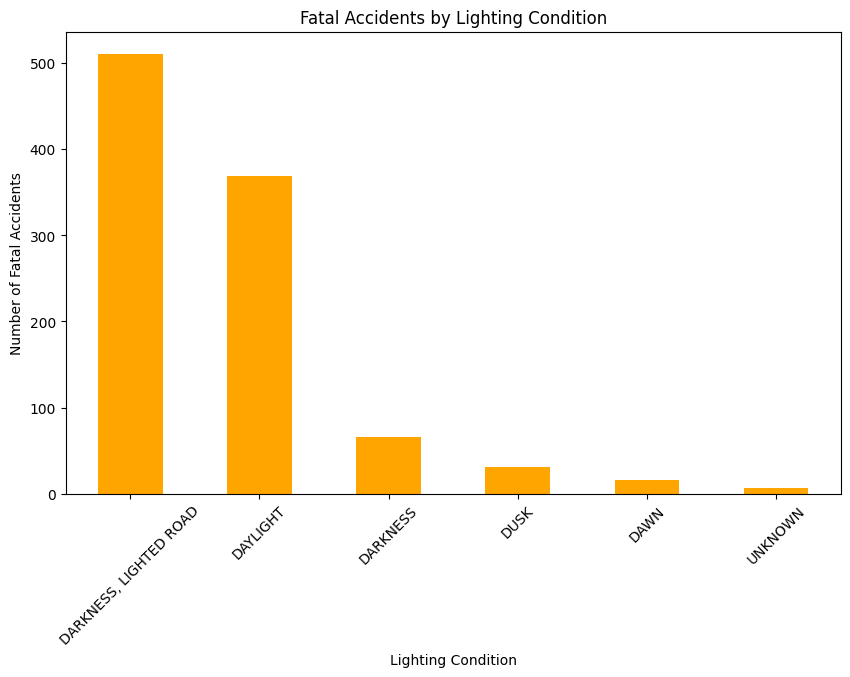

In [48]:
# Filter the dataset for fatal accidents
fatal_accidents = df[df['MOST_SEVERE_INJURY'] == 'FATAL']
fatal_accidents_by_lighting = fatal_accidents['LIGHTING_CONDITION'].value_counts()

plt.figure(figsize=(10, 6))
fatal_accidents_by_lighting.plot(kind='bar', color='orange')
plt.title('Fatal Accidents by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)
plt.show()

### 8. Stacked Bar Chart: Accident Severity by Lighting Condition

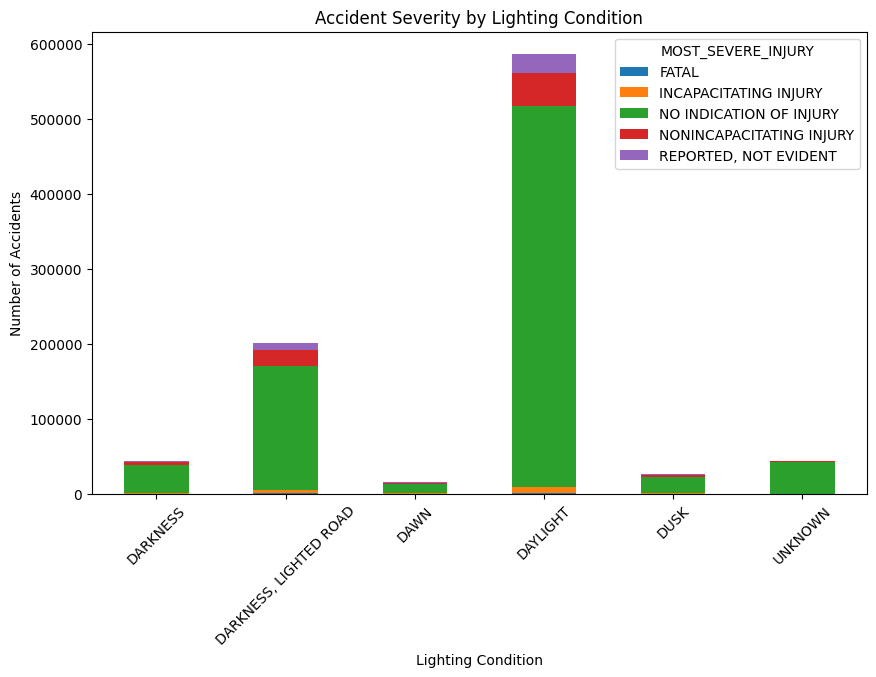

In [50]:
severity_by_lighting = df.groupby(['LIGHTING_CONDITION', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_by_lighting.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### 9. Top 6 Contributory Causes of Accidents

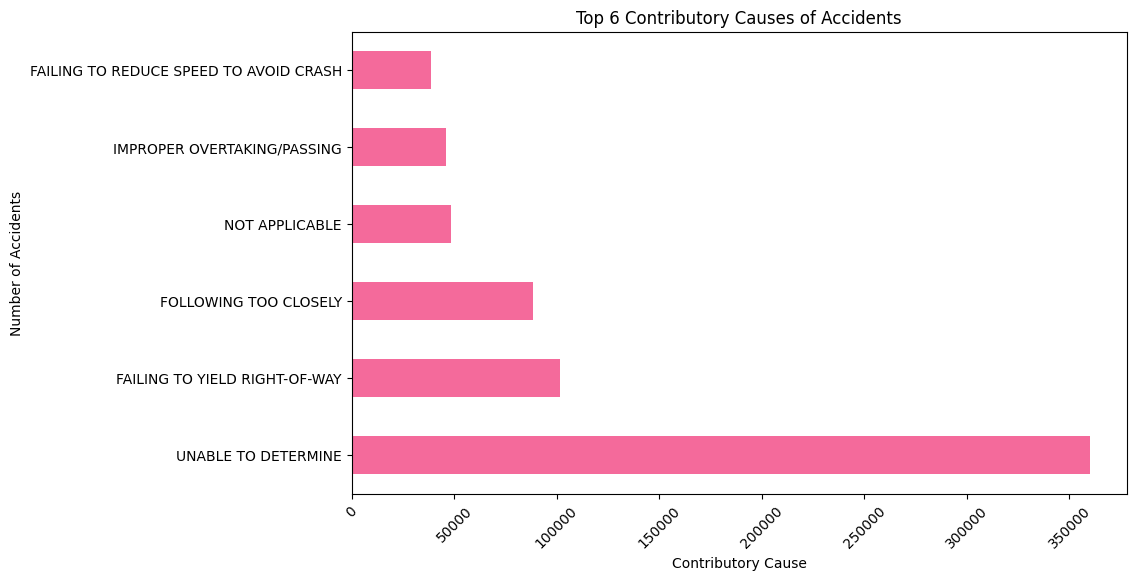

In [52]:
top_contributory_causes = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(6)
plt.figure(figsize=(10, 6))
top_contributory_causes.plot(kind='barh', color='#f46a9b')
plt.title('Top 6 Contributory Causes of Accidents')
plt.xlabel('Contributory Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### 10. Top Streets Involved in Accidents

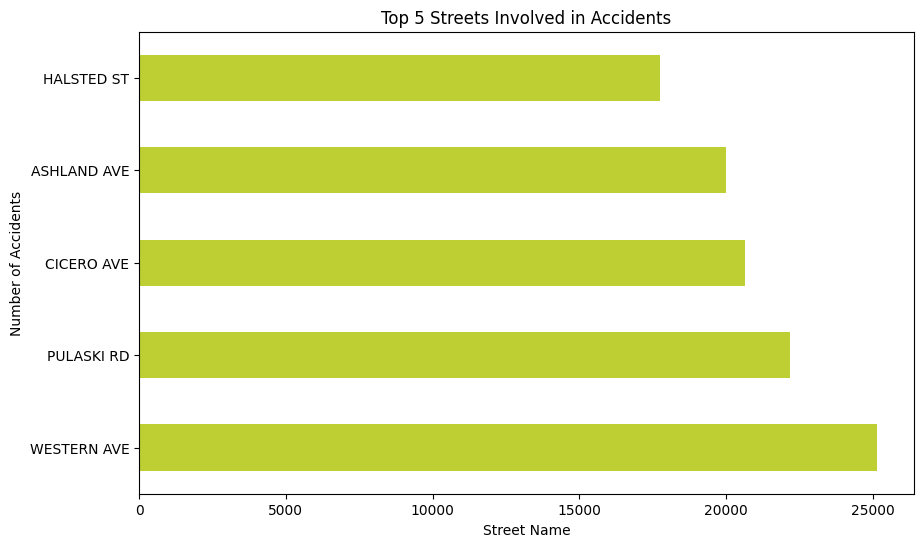

In [54]:
top_streets = df['STREET_NAME'].value_counts().head(5)
top_streets.plot(kind='barh', figsize=(10, 6), color='#bdcf32')
plt.title('Top 5 Streets Involved in Accidents')
plt.xlabel('Street Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

### 11. Accidents Involving Hit and Run Incidents

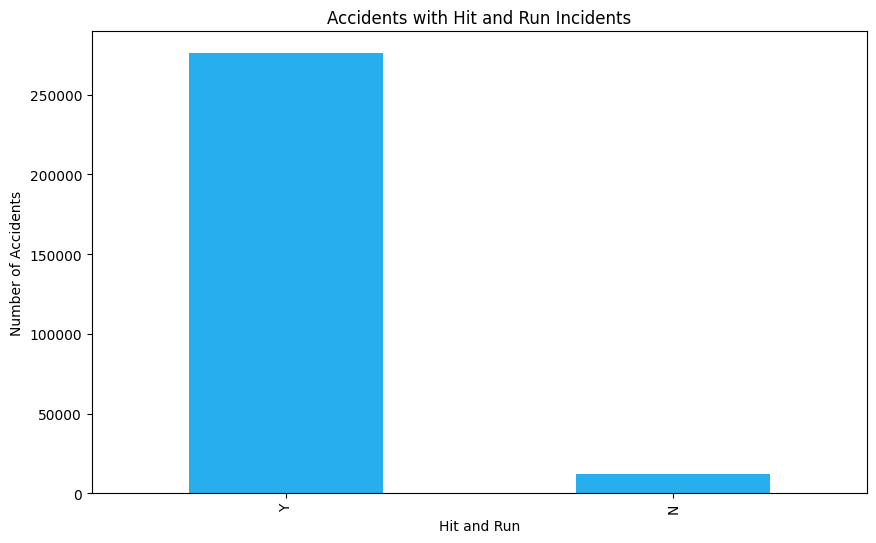

In [56]:
plt.figure(figsize=(10, 6))
df['HIT_AND_RUN_I'].value_counts().plot(kind='bar', color='#27aeef')
plt.title('Accidents with Hit and Run Incidents')
plt.xlabel('Hit and Run')
plt.ylabel('Number of Accidents')
plt.show()

### 12. Accidents by Day of the Week

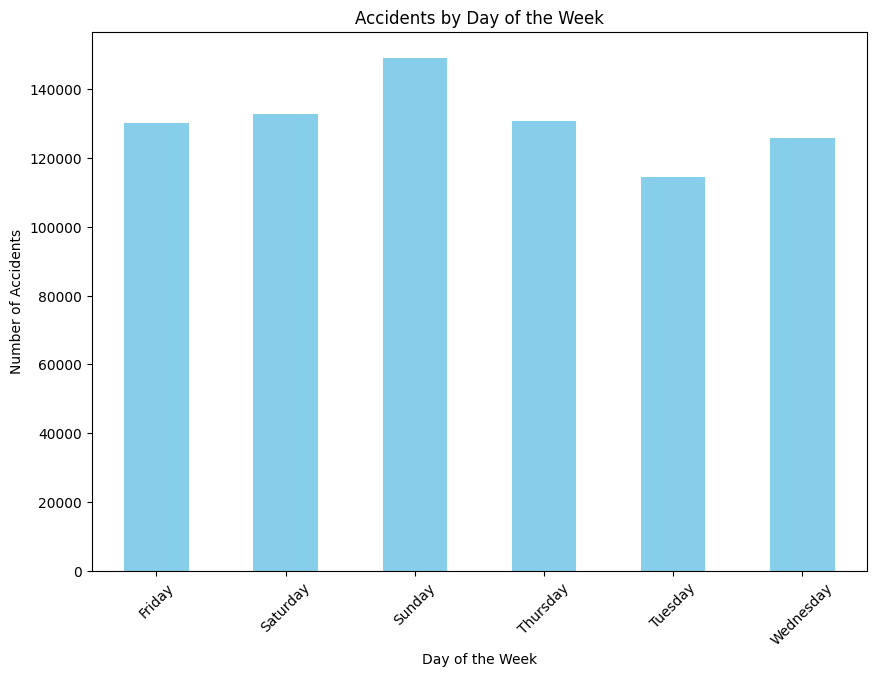

In [58]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_cleaned['Day_of_Week_Name'] = df_cleaned['CRASH_DAY_OF_WEEK'].map(day_mapping)
accidents_by_day = df_cleaned['Day_of_Week_Name'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### 13. Stacked Bar Chart: Severity of Injuries Based on Road Conditions

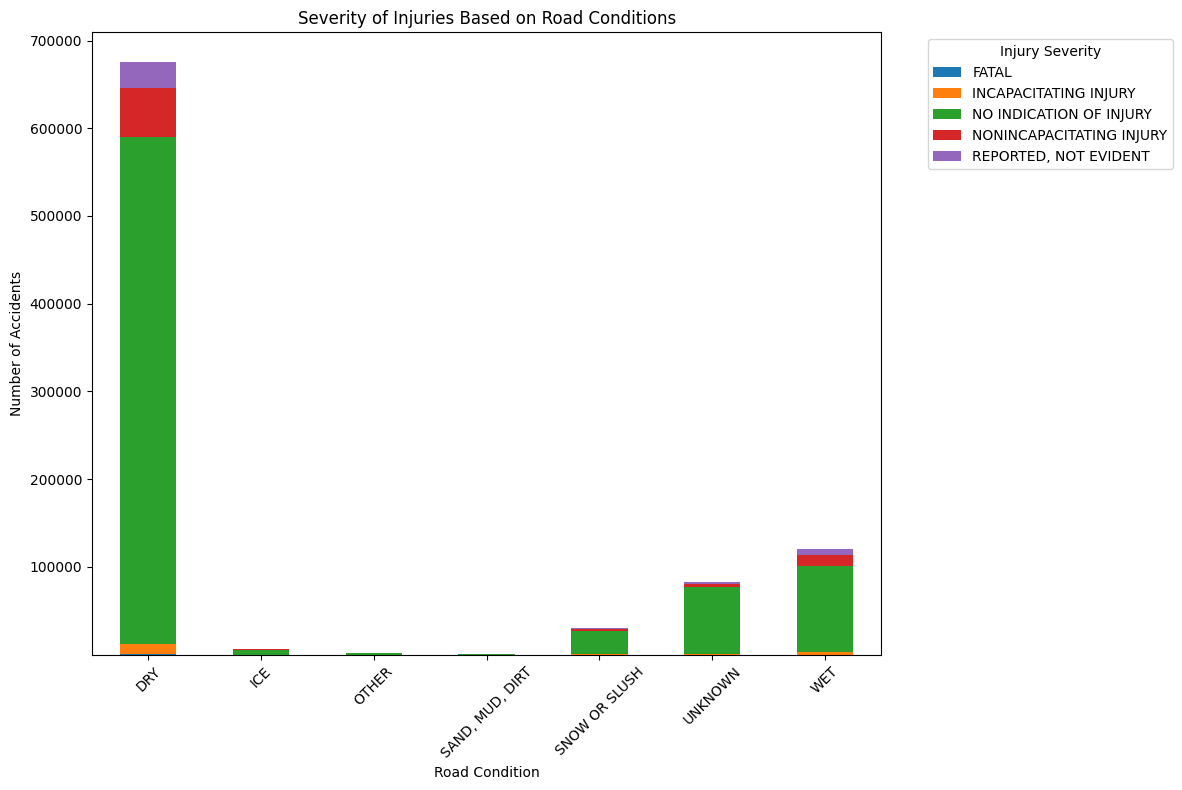

In [60]:
severity_by_road_conditions = df.groupby(['ROADWAY_SURFACE_COND', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)
severity_by_road_conditions.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Severity of Injuries Based on Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 14. Line Chart: Crash Frequency by Month

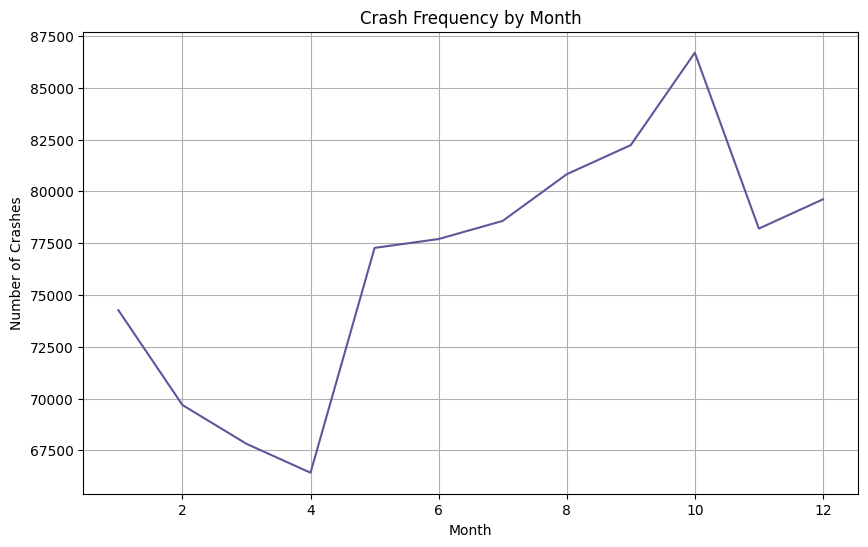

In [62]:
df.groupby('CRASH_MONTH').size().plot(kind='line', stacked=True, figsize=(10, 6), color='#5e569b')
plt.title('Crash Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

### 15. Fatal Accidents by Hour of the Day

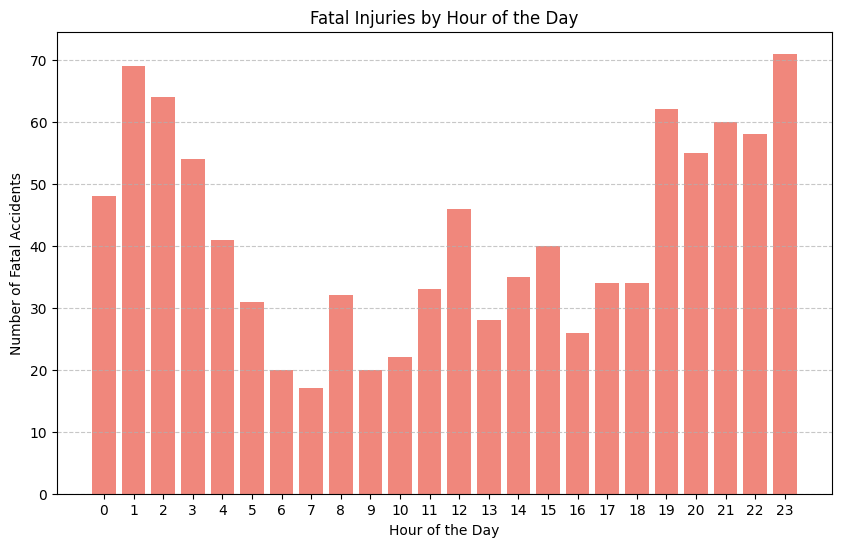

In [64]:
fatal_by_hour = fatal_accidents['CRASH_HOUR'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fatal_by_hour.index, fatal_by_hour.values, color="#ea5545", alpha=0.7)
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Injuries by Hour of the Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 16. Fatal Accidents Over the Months

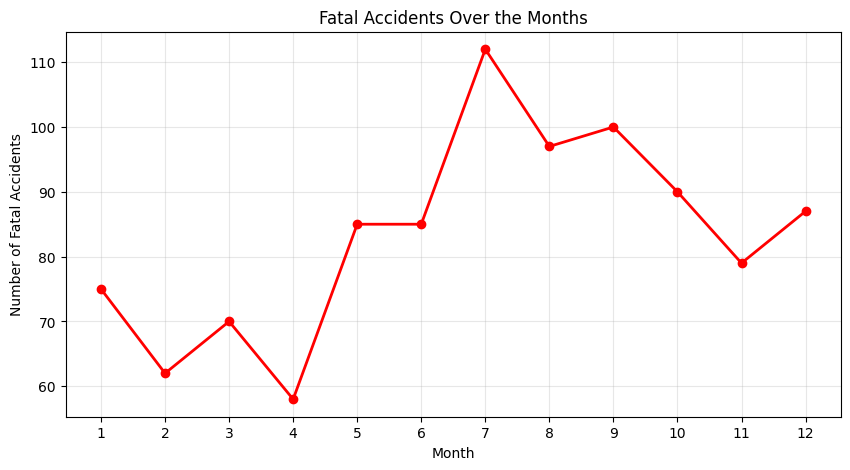

In [66]:
fatal_by_month = df[df['MOST_SEVERE_INJURY'] == 'FATAL'].groupby('CRASH_MONTH').size()
plt.figure(figsize=(10, 5))
plt.plot(fatal_by_month.index, fatal_by_month.values, marker='o', linestyle='-', color='red', linewidth=2)
plt.xlabel("Month")
plt.ylabel("Number of Fatal Accidents")
plt.title("Fatal Accidents Over the Months")
plt.xticks(range(1, 13))  # Ensuring all months are displayed
plt.grid(alpha=0.3)
plt.show()

### 17. Top 5 Streets with Most Fatal Injuries

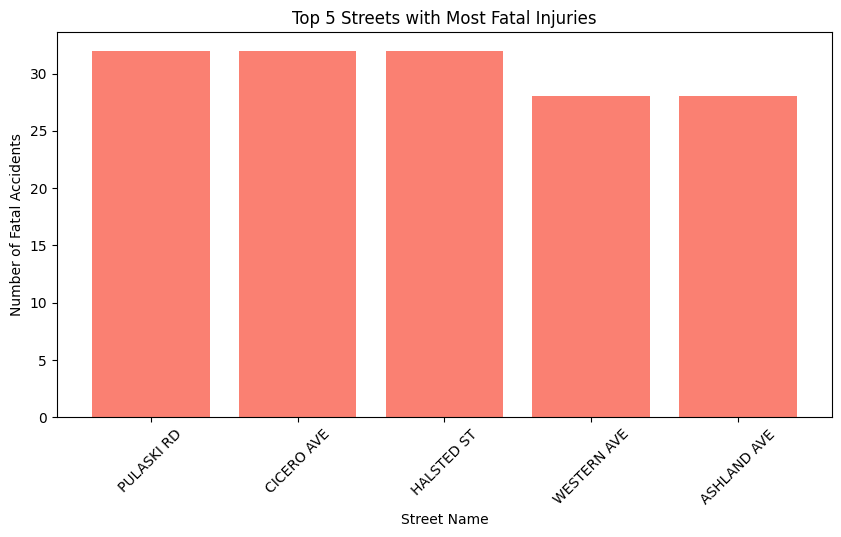

In [68]:
fatal_by_street = fatal_accidents['STREET_NAME'].value_counts().nlargest(5)
plt.figure(figsize=(10, 5))
plt.bar(fatal_by_street.index, fatal_by_street.values, color='salmon')
plt.xlabel("Street Name")
plt.ylabel("Number of Fatal Accidents")
plt.title("Top 5 Streets with Most Fatal Injuries")
plt.xticks(rotation=45)
plt.show()

### 18. Accidents by Traffic Control Device

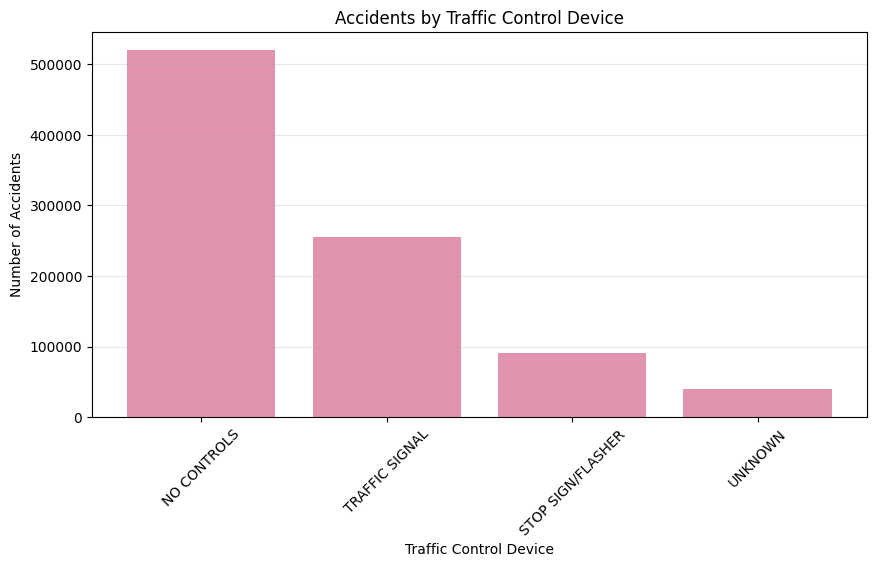

In [132]:
device_counts = df['TRAFFIC_CONTROL_DEVICE'].value_counts().nlargest(4)  

plt.figure(figsize=(10, 5))
plt.bar(device_counts.index, device_counts.values, color='#d7658b', alpha=0.7)

# Add labels and title
plt.xlabel("Traffic Control Device")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Traffic Control Device")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', alpha=0.3)

plt.show()


In [4]:
# 19. 

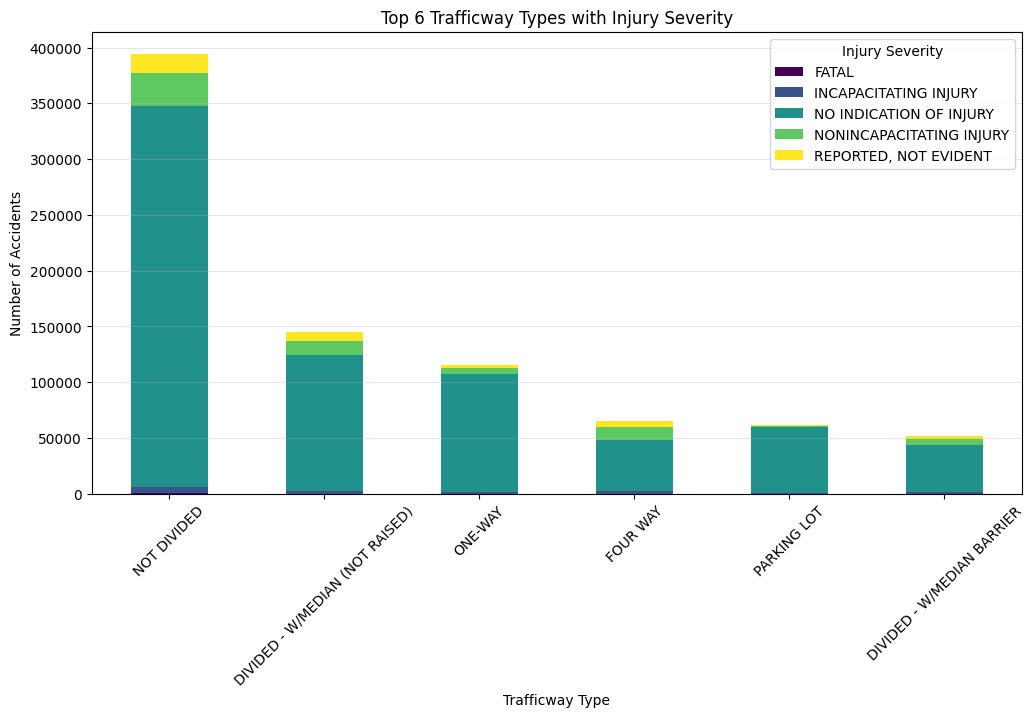

In [70]:
# Group data by Trafficway Type and Injury Severity, then count occurrences
trafficway_severity = df.groupby(['TRAFFICWAY_TYPE', 'MOST_SEVERE_INJURY']).size().unstack(fill_value=0)

# Sort by total accidents in descending order and select the top 6 trafficway types
top_trafficways = trafficway_severity.sum(axis=1).nlargest(6).index
top_trafficway_severity = trafficway_severity.loc[top_trafficways]

# Plot the bar chart
top_trafficway_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
plt.title('Top 6 Trafficway Types with Injury Severity')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.grid(axis='y', alpha=0.3)

plt.show()


### 20. Type of Injury vs Damage Caused

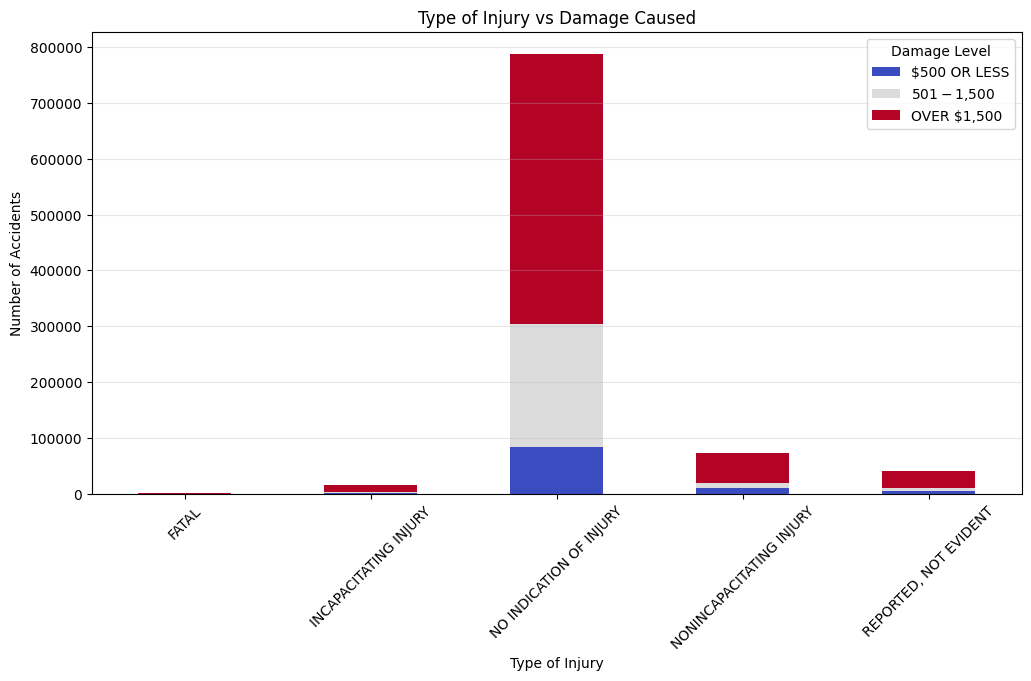

In [72]:
# Group data by Injury Severity and Damage, then count occurrences
injury_damage = df.groupby(['MOST_SEVERE_INJURY', 'DAMAGE']).size().unstack(fill_value=0)

# Plot the bar chart
injury_damage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Add labels and title
plt.title('Type of Injury vs Damage Caused')
plt.xlabel('Type of Injury')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Damage Level')
plt.grid(axis='y', alpha=0.3)

plt.show()
